# Import Libraries

In [1]:
# Pandas is the main library used for exploratory data analysis
# Pandas is built on top of numpy 
import pandas as pd
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np

# Load Data

In [2]:
# Load the data -stored on your computer
journal_df = pd.read_csv("Journal.csv") # the suffix _df stands for dataframe


In [3]:
#rename column headers
journal_df.columns = ["date", "sleep_hrs", "exercise_hrs", "book_hrs", "study_hrs", 
              "entertainment_hrs", "mood_score", "feelings", "weight_kgs", "goals", "menstrual_phase"]
journal_df.head()

,date,sleep_hrs,exercise_hrs,book_hrs,study_hrs,entertainment_hrs,mood_score,feelings,weight_kgs,goals,menstrual_phase
0,03/01/25,8.0,NaN,NaN,NaN,2.0,-2.0,Indiferent,64.2,ujuhiuwsh,Follicular
1,03/02/25,8.0,NaN,NaN,4.0,4.0,-1.0,Indiferent,64.0,vyuhvikaw,Follicular
2,03/03/25,7.0,0.25,NaN,5.0,1.0,1.0,"Grateful, Fine",63.8,wgsyuxhv,Follicular
3,03/04/25,5.0,1.00,2.00,6.0,2.0,2.0,"Frustrated, Angry, Fine",63.3,1.Innitiate Travel & life tracker Analysis Pro...,Ovuliation
4,03/05/25,6.0,0.50,0.25,3.0,0.5,3.0,Fine,63.4,"1. Populate Travel analysis, 2. Power BI, 3. F...",Ovuliation


In [4]:
#Data type of the data frame
print(type(journal_df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
journal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               30 non-null     object 
 1   sleep_hrs          27 non-null     float64
 2   exercise_hrs       25 non-null     float64
 3   book_hrs           24 non-null     float64
 4   study_hrs          26 non-null     float64
 5   entertainment_hrs  27 non-null     float64
 6   mood_score         27 non-null     float64
 7   feelings           27 non-null     object 
 8   weight_kgs         28 non-null     float64
 9   goals              28 non-null     object 
 10  menstrual_phase    27 non-null     object 
dtypes: float64(7), object(4)
memory usage: 2.7+ KB


In [6]:
# shape will return as tuple containing the number of rows and columns
print(journal_df.shape)
print(journal_df.shape[0])
print(journal_df.shape[1])

(30, 11)
30
11


# Data Cleaning 

#### Check Data Type

In [7]:
#check data types
journal_df.dtypes

date                  object
sleep_hrs            float64
exercise_hrs         float64
book_hrs             float64
study_hrs            float64
entertainment_hrs    float64
mood_score           float64
feelings              object
weight_kgs           float64
goals                 object
menstrual_phase       object
dtype: object

#### Fix Data Type

In [8]:
#Convert Strings into datetime
journal_df['date'] = pd.to_datetime(journal_df['date'], format='%m/%d/%y')
#Check Again
journal_df.dtypes

date                 datetime64[ns]
sleep_hrs                   float64
exercise_hrs                float64
book_hrs                    float64
study_hrs                   float64
entertainment_hrs           float64
mood_score                  float64
feelings                     object
weight_kgs                  float64
goals                        object
menstrual_phase              object
dtype: object

#### Check for duplicate values

In [9]:
#Check for duplicate values
journal_df.drop_duplicates(inplace=True) # will keep first copy

# reset the index
# REf: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
journal_df.reset_index(drop=True, inplace=True) # reset to default integer index

# Check
print(journal_df.shape)

(30, 11)


## Handle Missing Values

#### Check Missing Values

In [10]:
# Count of missing values in the whole dataframe by column
#journal_df.isnull().count() # does not work - gives the count of non-null values
#journal_df.isna().sum() # isna() is the same as isnull()

journal_df.isnull().sum()

date                 0
sleep_hrs            3
exercise_hrs         5
book_hrs             6
study_hrs            4
entertainment_hrs    3
mood_score           3
feelings             3
weight_kgs           2
goals                2
menstrual_phase      3
dtype: int64

#### Percentage of Missing Values (NaN)

In [11]:
# isna() - returns a dataframe of all boolean values True/False
# Each value is tested  whether it's missing or not
# Boolean values are treated as numeric 0/1 when doing arithmetic operations
# So we can calculate the sum and mean of a column of boolean value
# Instead of calculating the sum and dividing by the number of rows, we can use the mean directly

percent_missing = round(journal_df.isna().mean() * 100, 4)
print(percent_missing)
journal_df.head()

date                  0.0000
sleep_hrs            10.0000
exercise_hrs         16.6667
book_hrs             20.0000
study_hrs            13.3333
entertainment_hrs    10.0000
mood_score           10.0000
feelings             10.0000
weight_kgs            6.6667
goals                 6.6667
menstrual_phase      10.0000
dtype: float64


,date,sleep_hrs,exercise_hrs,book_hrs,study_hrs,entertainment_hrs,mood_score,feelings,weight_kgs,goals,menstrual_phase
0,2025-03-01,8.0,NaN,NaN,NaN,2.0,-2.0,Indiferent,64.2,ujuhiuwsh,Follicular
1,2025-03-02,8.0,NaN,NaN,4.0,4.0,-1.0,Indiferent,64.0,vyuhvikaw,Follicular
2,2025-03-03,7.0,0.25,NaN,5.0,1.0,1.0,"Grateful, Fine",63.8,wgsyuxhv,Follicular
3,2025-03-04,5.0,1.00,2.00,6.0,2.0,2.0,"Frustrated, Angry, Fine",63.3,1.Innitiate Travel & life tracker Analysis Pro...,Ovuliation
4,2025-03-05,6.0,0.50,0.25,3.0,0.5,3.0,Fine,63.4,"1. Populate Travel analysis, 2. Power BI, 3. F...",Ovuliation


#### Replace Missing Values(NaN) With 0

In [12]:
# Drop rows with missing values or fill them
journal_df.dropna(subset=['goals'], inplace=True)  # Removing NaN from Goals column
journal_df.fillna(0, inplace=True)  # Fill remaining NaNs with 0

#Chcek again 
percent_missing = round(journal_df.isna().mean() * 100, 4)
print(percent_missing)

date                 0.0
sleep_hrs            0.0
exercise_hrs         0.0
book_hrs             0.0
study_hrs            0.0
entertainment_hrs    0.0
mood_score           0.0
feelings             0.0
weight_kgs           0.0
goals                0.0
menstrual_phase      0.0
dtype: float64


## Handle Outliners

In [13]:
#significantly different from the rest of the dataset. 
#unusually high or low values that don't follow the general pattern of the data.
# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
# pandas also have same basic plotting capabilities which are again built on top of matplotlib
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

#### Visual Outliners

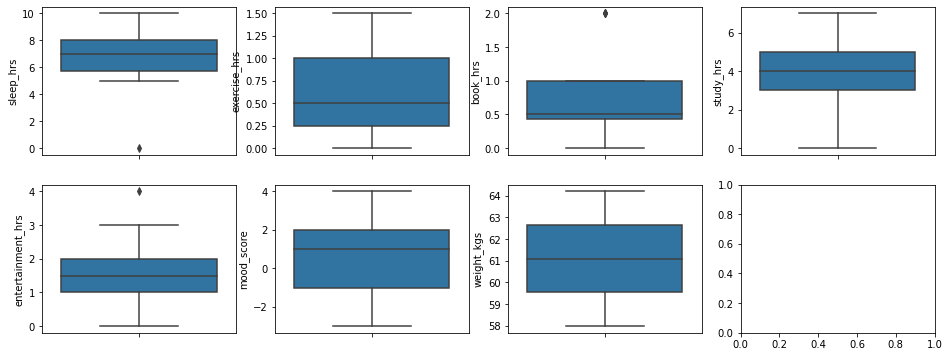

In [14]:
# Ref: https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, ax = plt.subplots(2,4, figsize=(16,6))  # 2 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=journal_df["sleep_hrs"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=journal_df["exercise_hrs"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=journal_df["book_hrs"], ax=ax[0,2])
ax4 = sns.boxplot(y=journal_df["study_hrs"], ax=ax[0,3])

# Row 1
ax5 = sns.boxplot(y=journal_df["entertainment_hrs"], ax=ax[1,0])
ax6 = sns.boxplot(y=journal_df["mood_score"], ax=ax[1,1])
ax7 = sns.boxplot(y=journal_df["weight_kgs"], ax=ax[1,2])

#### Percentages of Outlier

In [15]:
# percentages of outlier per columns
# Outliers only apply to continuous numerical values(not to strings or numerical categories)

columns = ['sleep_hrs', 'exercise_hrs', 'book_hrs', 'study_hrs', 
              'entertainment_hrs', 'mood_score', 'weight_kgs']

print(columns)
print()

for col in columns:
    percentile_25 = journal_df[col].quantile(0.25)
    percentile_75 = journal_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    total = len(journal_df[col])
    #total = journal_df[col].shape[0] # also works

    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR those that are greater than the upper boundary
    #num_outliers = journal_df[(journal_df[col] < lower) | (journal_df[col] > upper)].count() # returns a list of things
    num_outliers = len(journal_df[(journal_df[col] < lower) | (journal_df[col] > upper)])
    
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()

['sleep_hrs', 'exercise_hrs', 'book_hrs', 'study_hrs', 'entertainment_hrs', 'mood_score', 'weight_kgs']

col: sleep_hrs, lower: 2.375, upper: 11.375
Num outliers: 1, total rows: 28, percent: 3.57

col: exercise_hrs, lower: -0.875, upper: 2.125
Num outliers: 0, total rows: 28, percent: 0.0

col: book_hrs, lower: -0.40625, upper: 1.84375
Num outliers: 3, total rows: 28, percent: 10.71

col: study_hrs, lower: 0.0, upper: 8.0
Num outliers: 0, total rows: 28, percent: 0.0

col: entertainment_hrs, lower: -0.5, upper: 3.5
Num outliers: 1, total rows: 28, percent: 3.57

col: mood_score, lower: -5.5, upper: 6.5
Num outliers: 0, total rows: 28, percent: 0.0

col: weight_kgs, lower: 54.885000000000005, upper: 67.30499999999999
Num outliers: 0, total rows: 28, percent: 0.0



#### Replace Outliners with Median Value

In [16]:
# Using Inter Quartile Range (IQR) to detect outliers (for non-normal (non-Gaussian) distributions)

columns = ['sleep_hrs', 'exercise_hrs', 'book_hrs', 'study_hrs', 
              'entertainment_hrs', 'mood_score', 'weight_kgs']

for col in columns:
    median_val = journal_df[col].quantile(0.50)
    percentile_25 = journal_df[col].quantile(0.25)
    percentile_75 = journal_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # Replace all values that are less than the lower boundary OR those that are greater than the upper boundary
    journal_df[col] = np.where((journal_df[col] < lower) | (journal_df[col] > upper), median_val, journal_df[col])
 
#journal_df.describe()
journal_df.describe().T  # T means transpose - will transpose rows to column

col: sleep_hrs, lower: 2.375, upper: 11.375,  median_val: 7.0
col: exercise_hrs, lower: -0.875, upper: 2.125,  median_val: 0.5
col: book_hrs, lower: -0.40625, upper: 1.84375,  median_val: 0.5
col: study_hrs, lower: 0.0, upper: 8.0,  median_val: 4.0
col: entertainment_hrs, lower: -0.5, upper: 3.5,  median_val: 1.5
col: mood_score, lower: -5.5, upper: 6.5,  median_val: 1.0
col: weight_kgs, lower: 54.885000000000005, upper: 67.30499999999999,  median_val: 61.095


,count,mean,std,min,25%,50%,75%,max
sleep_hrs,28.0,6.750000,1.322876,5.00,6.0000,7.000,8.0000,10.0
exercise_hrs,28.0,0.705357,0.495599,0.00,0.2500,0.500,1.0000,1.5
book_hrs,28.0,0.580357,0.360385,0.00,0.4375,0.500,1.0000,1.0
study_hrs,28.0,4.000000,1.845916,0.00,3.0000,4.000,5.0000,7.0
entertainment_hrs,28.0,1.500000,0.707107,0.00,1.0000,1.250,2.0000,3.0
mood_score,28.0,0.500000,2.099383,-3.00,-1.0000,1.000,2.0000,4.0
weight_kgs,28.0,61.095000,1.892591,57.99,59.5425,61.095,62.6475,64.2


## View Cleaned Data 

In [17]:
journal_df.head()

#journal_df.to_csv('journal-cleaned.csv', index=False) # Save in current folder

,date,sleep_hrs,exercise_hrs,book_hrs,study_hrs,entertainment_hrs,mood_score,feelings,weight_kgs,goals,menstrual_phase
0,2025-03-01,8.0,0.00,0.00,0.0,2.0,-2.0,Indiferent,64.2,ujuhiuwsh,Follicular
1,2025-03-02,8.0,0.00,0.00,4.0,1.5,-1.0,Indiferent,64.0,vyuhvikaw,Follicular
2,2025-03-03,7.0,0.25,0.00,5.0,1.0,1.0,"Grateful, Fine",63.8,wgsyuxhv,Follicular
3,2025-03-04,5.0,1.00,0.50,6.0,2.0,2.0,"Frustrated, Angry, Fine",63.3,1.Innitiate Travel & life tracker Analysis Pro...,Ovuliation
4,2025-03-05,6.0,0.50,0.25,3.0,0.5,3.0,Fine,63.4,"1. Populate Travel analysis, 2. Power BI, 3. F...",Ovuliation


# Split Data Set

In [18]:
# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 
# Store the features in variable X (uppercase as there are multiple features)

# Features are variables that affect the target/label
# So, it's all the columns excluding the target column f
# You might want to experiment with both the full set and the best features
# However random_state=2 # pass an int for reproducible rtesult
                                                   
feature_cols = ['sleep_hrs', 'exercise_hrs', 'book_hrs', 'study_hrs', 
                'entertainment_hrs', 'mood_score', 'weight_kgs']

X = journal_df[feature_cols]
#print('X:\n', X)

# Store the labels/target in variable y (lower case as its a single value)
y = journal_df['mood_score']
#print('y:\n', y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # keep 20% for testing
                                                    random_state=2 # pass an int for reproducible rtesult
                                                    )

In [19]:
#X_train

In [20]:
#X_test

In [21]:
#y_train

In [22]:
#y_test 

In [23]:
#train_test_split

# EDA

#### Summary statistics

In [24]:
print(journal_df.describe())# Shows mean, min, max, etc., for numerical columns

# Check unique values in categorical columns
print(journal_df['menstrual_phase'].value_counts())
print(journal_df['feelings'].value_counts())

       sleep_hrs  exercise_hrs   book_hrs  study_hrs  entertainment_hrs  \
count  28.000000     28.000000  28.000000  28.000000          28.000000   
mean    6.750000      0.705357   0.580357   4.000000           1.500000   
std     1.322876      0.495599   0.360385   1.845916           0.707107   
min     5.000000      0.000000   0.000000   0.000000           0.000000   
25%     6.000000      0.250000   0.437500   3.000000           1.000000   
50%     7.000000      0.500000   0.500000   4.000000           1.250000   
75%     8.000000      1.000000   1.000000   5.000000           2.000000   
max    10.000000      1.500000   1.000000   7.000000           3.000000   

       mood_score  weight_kgs  
count   28.000000   28.000000  
mean     0.500000   61.095000  
std      2.099383    1.892591  
min     -3.000000   57.990000  
25%     -1.000000   59.542500  
50%      1.000000   61.095000  
75%      2.000000   62.647500  
max      4.000000   64.200000  
Luteal        8
Ovuliation    7
Foll

#### Distributions

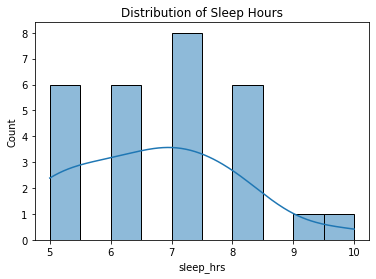

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Sleep Hours
sns.histplot(journal_df['sleep_hrs'], bins=10, kde=True)
plt.title('Distribution of Sleep Hours')
plt.show()

# Data Transfromation 

#### One-hot Encoded

In [ ]:
# Libary needed for onehot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# 1. Select the columns to one-hot encode
# Make sure the columns are categorical columns with multiple labels 
# It does not matter whether the labels are words or numbers
# Better list all the columns and comment out the ones you don't need
columns_to_onehot_encode = [#"date", 
                             "sleep_hrs", 
                             "exercise_hrs", 
                             "book_hrs", 
                             "study_hrs", 
                             "entertainment_hrs", 
                             "mood_score", 
                             #"feelings", 
                             "weight_kgs", 
                             #"goals", 
                             #"menstrual_phase"
]

# 2 Instantiate a one-hot encoder
#enc = OneHotEncoder() # No, this will generate strings, not numbers
enc = LabelBinarizer()

# 3. Fit the encoder on the training column and transform the training and testing columns
# Use a loop to label encode all the required columns 
for col in columns_to_onehot_encode:
    # Option 1. Using pandas (simpler than sklearn)
    ## Fix X_train
    dummies_df = pd.get_dummies(X_train[col]) # generate dataframe of dummies
    X_train.drop([col], axis=1, inplace=True) # drop original column
    X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
    ## Fix X_test
    dummies_df = pd.get_dummies(X_test[col])
    X_test.drop([col], axis=1, inplace=True)
    X_test = pd.concat([X_test, dummies_df], axis=1)
   
# Check
X_train.head()


# Scaling  

In [ ]:
# Library to scale values
from sklearn.preprocessing import StandardScaler
# Scale the columns with continuous values
# 1. Select the columns to scale
# Make sure they are continuous columns as scaling is only for continuous values
# Better list all the columns and comment out the ones you don't need
columns_to_scale = [
                    'sleep_hrs', 
                    'exercise_hrs', 
                    'book_hrs', 
                    'study_hrs',
                    'entertainment_hrs', 
                    'mood_score', 
                     
                    'weight_kgs'
]

# 2. Make copy of the training and testing sets fix the issue below
# Warning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
X_train = X_train.copy()
X_test = X_test.copy()

# 3. Instantiate a scaler
scaler = StandardScaler()

#print(journal_df.columns)  # Check column names

# 4. Fit the scaler on the training column and transform the training and testing columns
# Use a loop to scale all the required columns    
for col in columns_to_scale:
    #print(col)
    # First fit the scaler to the column in the training data
    # Must reshape the numpy array returned b the scaler from 1D to 2D
    scaler.fit(X_train[col].values.reshape(-1, 1))
    # Then transform both the training and testing sets
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

# Check
print(X_train.shape, X_test.shape)

In [ ]:
# Check again
#X_train.head()

In [ ]:
# Check again
#X_test.head()

# Modeling 

## Linear Regression

In [26]:
#Train a model
from sklearn.linear_model import LinearRegression
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred

array([-1.00000000e+00, -2.00000000e+00,  8.11534314e-16,  1.00000000e+00,
       -3.00000000e+00, -2.00000000e+00])

#### Evaluation(Performance Score- -LR)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
# Model Performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")  # Closer to 1 means better fit
print(f"Mean Squared Error: {mse:.2f}")  # Lower is better

R² Score: 1.00
Mean Squared Error: 0.00


# Visualize

#### Mood Score Over Time

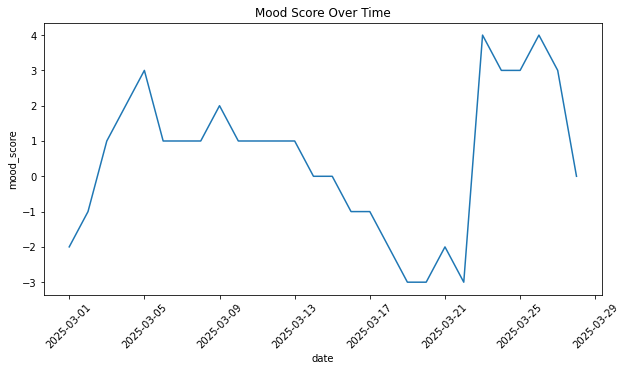

In [28]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=journal_df['date'], y=journal_df['mood_score'])
plt.title('Mood Score Over Time')
plt.xticks(rotation=45)
plt.show()

#### Sleep Hours vs. Mood Score

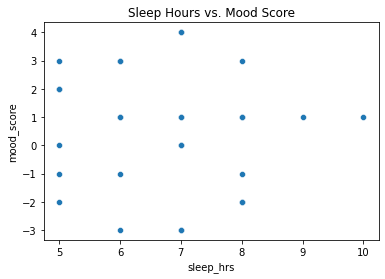

In [29]:
sns.scatterplot(x=journal_df['sleep_hrs'], y=journal_df['mood_score'])
plt.title('Sleep Hours vs. Mood Score')
plt.show()

#### Exercise vs. Weight

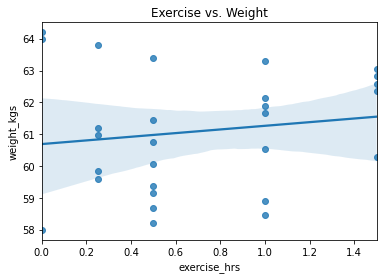

In [30]:
sns.regplot(x=journal_df['exercise_hrs'], y=journal_df['weight_kgs'])
plt.title('Exercise vs. Weight')
plt.show()

#### Mood Score Across Menstrual Phases

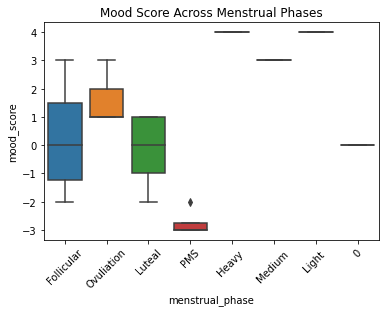

In [31]:
sns.boxplot(x=journal_df['menstrual_phase'], y=journal_df['mood_score'])
plt.title('Mood Score Across Menstrual Phases')
plt.xticks(rotation=45)
plt.show()

#### Correlation Matrix

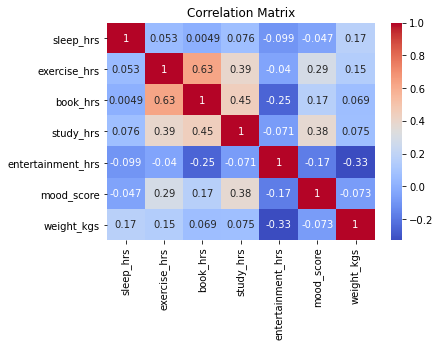

In [32]:
correlation_matrix = journal_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Study & Book Reading Trends

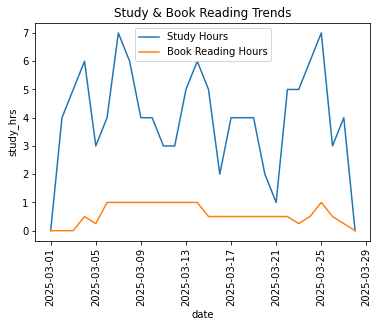

In [33]:
sns.lineplot(x=journal_df['date'], y=journal_df['study_hrs'], label="Study Hours")
sns.lineplot(x=journal_df['date'], y=journal_df['book_hrs'], label="Book Reading Hours")
plt.legend()
plt.title("Study & Book Reading Trends")
plt.xticks(rotation=90)
plt.show()